# Project 3

In [2]:
def P_topdown(C, w, p, currentMax = None):
    # Capital P -> function and small p -> list of profits
    if currentMax is None:
        currentMax = {}
    if C in currentMax:
        return currentMax[C]
    if C == 0:
        return 0
    
    maxProfit = 0
    for i in range(len(w)):
        if w[i] <= C:
            profit  = p[i] + P_topdown(C-w[i], w, p, currentMax)
            maxProfit = max(profit, maxProfit)
    
    currentMax[C] = maxProfit
    return maxProfit


### Recursive Definition

Let  P(C)  be the maximum profit obtainable with a knapsack of capacity \( C \).

\[
P(C) =
\begin{cases}
0, & \text{if } C = 0, \\
\max\limits_{i : w (i) \leq C} \big( p (i) + P(C - w (i)) \big), & \text{if } C > 0.
\end{cases}
\]

-  w (i)  is the weight of the  *ith*  item type  
-  p (i)  is the profit of the  *ith*  item type  
- There are unlimited items of each type available.


# Top-down : Test case (a)

In [5]:
weights1 = [4, 6, 8]
profits1 = [7, 6, 9]
C = 14

print("P_topdown(14) =", P_topdown(C, weights1, profits1))

P_topdown(14) = 21


# Bottom-up : Test case (b)

In [7]:
weights2 = [5, 6, 8]
profits2 = [7, 6, 9]
C = 14

print("P_topdown(14) =", P_topdown(C, weights2, profits2))

P_topdown(14) = 16


In [9]:
def P_bottomup(C, w, p):
    dp = [0] * (C + 1)
    
    for capacity in range(1, C + 1):
        for i in range(len(w)):
            if w[i] <= capacity:
                profit = p[i] + dp[capacity - w[i]]
                dp[capacity] = max(dp[capacity], profit)
    
    return dp[C]

In [11]:
weights = [4, 6, 8]
profits = [7, 6, 9]
C = 14

print("P_bottomup(14) =", P_bottomup(C, weights1, profits1))

P_bottomup(14) = 21


In [13]:
weights2 = [5, 6, 8]
profits2 = [7, 6, 9]
C = 14

print("P_bottomup(14) =", P_bottomup(C, weights2, profits2))

P_bottomup(14) = 16


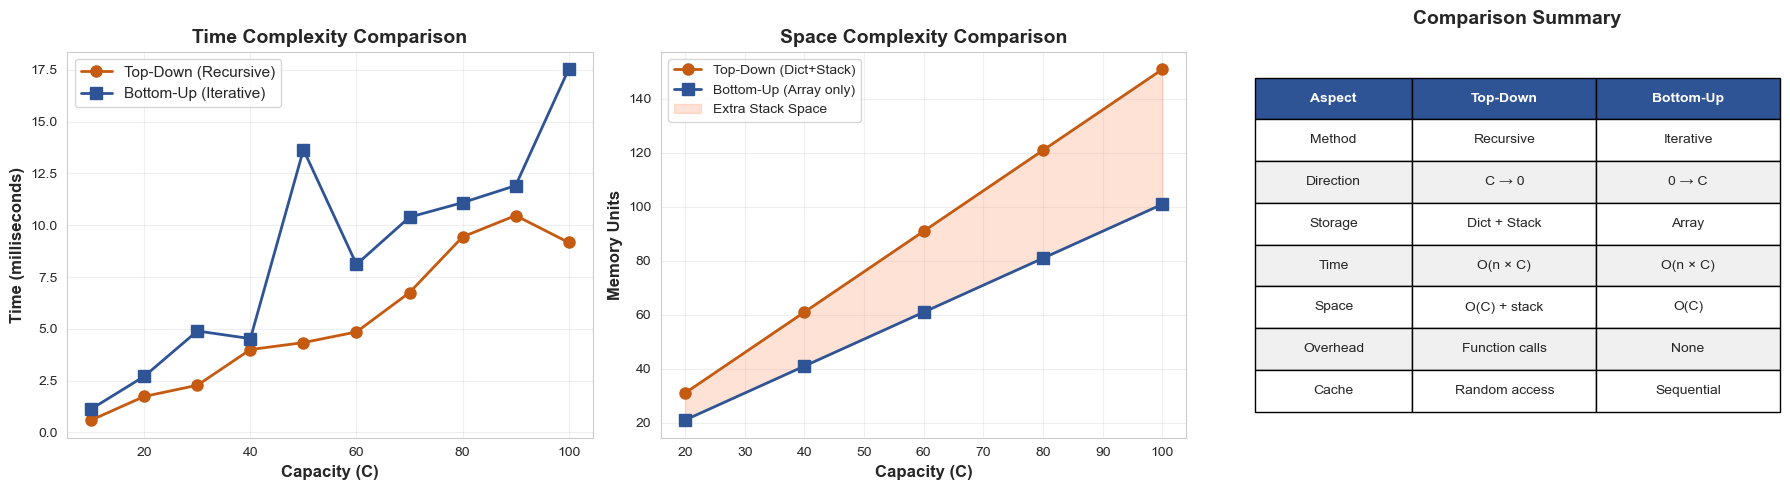


TEST RESULTS
Test Case (a): w=[4,6,8], p=[7,6,9], C=14
  Top-Down:    P(14) = 21
  Bottom-Up:   P(14) = 21
  Match: ✓

Test Case (b): w=[5,6,8], p=[7,6,9], C=14
  Top-Down:    P(14) = 16
  Bottom-Up:   P(14) = 16
  Match: ✓


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


ax1 = axes[0]
capacities = list(range(10, 101, 10))
weights = [4, 6, 8]
profits = [7, 6, 9]

topdown_times = []
bottomup_times = []

for C in capacities:
    start = time.perf_counter()
    for _ in range(100):
        P_topdown(C, weights, profits)
    topdown_times.append((time.perf_counter() - start) * 1000)
    
    start = time.perf_counter()
    for _ in range(100):
        P_bottomup(C, weights, profits)
    bottomup_times.append((time.perf_counter() - start) * 1000)

ax1.plot(capacities, topdown_times, 'o-', linewidth=2, markersize=8, 
         label='Top-Down (Recursive)', color='#C55A11')
ax1.plot(capacities, bottomup_times, 's-', linewidth=2, markersize=8, 
         label='Bottom-Up (Iterative)', color='#2F5496')
ax1.set_xlabel('Capacity (C)', fontweight='bold', fontsize=12)
ax1.set_ylabel('Time (milliseconds)', fontweight='bold', fontsize=12)
ax1.set_title('Time Complexity Comparison', fontweight='bold', fontsize=14)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)


ax2 = axes[1]
capacities_space = [20, 40, 60, 80, 100]
bottomup_space = [c + 1 for c in capacities_space]
topdown_space = [c + 1 + c//2 for c in capacities_space]  

ax2.plot(capacities_space, topdown_space, 'o-', linewidth=2, markersize=8,
         label='Top-Down (Dict+Stack)', color='#C55A11')
ax2.plot(capacities_space, bottomup_space, 's-', linewidth=2, markersize=8,
         label='Bottom-Up (Array only)', color='#2F5496')
ax2.fill_between(capacities_space, bottomup_space, topdown_space, 
                 alpha=0.3, color='#FFA07A', label='Extra Stack Space')

ax2.set_xlabel('Capacity (C)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Memory Units', fontweight='bold', fontsize=12)
ax2.set_title('Space Complexity Comparison', fontweight='bold', fontsize=14)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)


ax3 = axes[2]
ax3.axis('off')

comparison_data = [
    ['Aspect', 'Top-Down', 'Bottom-Up'],
    ['Method', 'Recursive', 'Iterative'],
    ['Direction', 'C → 0', '0 → C'],
    ['Storage', 'Dict + Stack', 'Array'],
    ['Time', 'O(n × C)', 'O(n × C)'],
    ['Space', 'O(C) + stack', 'O(C)'],
    ['Overhead', 'Function calls', 'None'],
    ['Cache', 'Random access', 'Sequential']
]

table = ax3.table(cellText=comparison_data, cellLoc='center', loc='center',
                  colWidths=[0.3, 0.35, 0.35])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)


for i in range(3):
    table[(0, i)].set_facecolor('#2F5496')
    table[(0, i)].set_text_props(weight='bold', color='white')

for i in range(1, len(comparison_data)):
    for j in range(3):
        if i % 2 == 0:
            table[(i, j)].set_facecolor('#F0F0F0')

ax3.set_title('Comparison Summary', fontweight='bold', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


weights1 = [4, 6, 8]
profits1 = [7, 6, 9]
weights2 = [5, 6, 8]
profits2 = [7, 6, 9]
C = 14

result1_td = P_topdown(C, weights1, profits1)
result1_bu = P_bottomup(C, weights1, profits1)
result2_td = P_topdown(C, weights2, profits2)
result2_bu = P_bottomup(C, weights2, profits2)

print("\n" + "="*70)
print("TEST RESULTS")
print("="*70)
print(f"Test Case (a): w=[4,6,8], p=[7,6,9], C=14")
print(f"  Top-Down:    P(14) = {result1_td}")
print(f"  Bottom-Up:   P(14) = {result1_bu}")
print(f"  Match: {'✓' if result1_td == result1_bu else '✗'}")

print(f"\nTest Case (b): w=[5,6,8], p=[7,6,9], C=14")
print(f"  Top-Down:    P(14) = {result2_td}")
print(f"  Bottom-Up:   P(14) = {result2_bu}")
print(f"  Match: {'✓' if result2_td == result2_bu else '✗'}")
print("="*70)